<a href="https://colab.research.google.com/github/VFV-main/Computer-Vision/blob/main/Tensorflow_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
import albumentations
import cv2
import numpy as np
import matplotlib.pyplot as plt
from albumentations import Compose,HorizontalFlip,CLAHE,HueSaturationValue,RandomBrightness,RandomContrast,RandomGamma,ToFloat,ShiftScaleRotate

In [ ]:
aug_train = Compose([
                     HorizontalFlip(p=0.8),
                     RandomContrast(),
                     RandomGamma(),
                     RandomBrightness(),
                     HueSaturationValue(hue_shift_limit=5,sat_shift_limit=20,val_shift_limit=10,p=0.9),
                     ShiftScaleRotate(rotate_limit=15,p=0.8),
                     ToFloat(max_value=255)
])
aug_test = Compose([
                    ToFloat(max_value=255)
])

In [ ]:
from tensorflow.python.keras.utils.data_utils import Sequence

In [ ]:
class CIFAR10Dataset(Sequence):
    def __init__(self, x_set, y_set, batch_size, augmentations):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.augment = augmentations

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    # 지정 배치 크기만큼 데이터를 로드합니다.
    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        # augmentation을 적용해서 numpy array에 stack합니다.
        return np.stack([
            self.augment(image=x)["image"] for x in batch_x
        ], axis=0), np.array(batch_y)
  
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
batch_size=8
train_gen = CIFAR10Dataset(x_train,y_train,batch_size,aug_train)
test_gen = CIFAR10Dataset(x_test,y_test,batch_size,aug_test)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


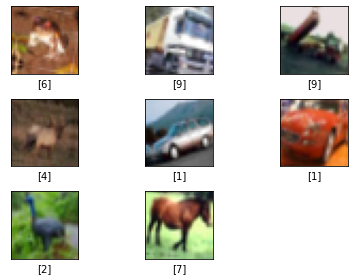

In [ ]:
images,labels = next(iter(train_gen))

fig = plt.figure()
for i,(image,label) in enumerate(zip(images,labels)):
  ax = fig.add_subplot(3,3,i+1)
  ax.imshow(image)
  ax.set_xlabel(label)
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
from glob import glob
from PIL import Image
import numpy as np
import pandas as pd

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'vfvlog'
os.environ['KAGGLE_KEY'] = '04841640182cd67c524a2c3b3d2f8ded'

In [ ]:
!rm *.*
!kaggle datasets download -d vfvlog/pill-datasets25class
!unzip '*.zip'

In [ ]:
train_paths = glob('train/*.jpg')
val_paths = glob('validation/*.jpg')
test_paths = glob('test/*.jpg')

In [ ]:
def get_class_name(path):
  fname = os.path.basename(path)
  cls_name = fname.split('.')[0]
  return cls_name

In [ ]:
classes_name_train = [get_class_name(path) for path in train_paths]

(array(['197000079', '197000102', '197000196', '197000208', '197000211',
       '197100081', '197100097', '197100165', '197200084', '198200576',
       '198300065', '198300327', '198401028', '199700734', '199700756',
       '199802438', '199902270', '200001102', '200009625', '200100125',
       '200100478', '200100480', '200100482', '201405111', '201602122'],
      dtype='<U9'), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))


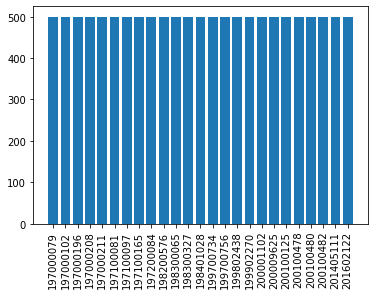

In [ ]:
unique = np.unique(classes_name_train,return_counts=True)
print(unique)
plt.bar(*unique)
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_data = {'path':train_paths,'class':[get_class_name(path) for path in train_paths]}

In [ ]:
x_train = train_data['path']
x_test = train_data['class']

In [ ]:
test_data = {'path':test_paths,'class':[get_class_name(path) for path in test_paths]}

In [ ]:
y_train = test_data['path']
y_test = test_data['class']

In [ ]:
from albumentations import Compose,HorizontalFlip,HueSaturationValue,CLAHE,ToFloat,ShiftScaleRotate,RandomGamma,RandomContrast,RandomBrightness

In [ ]:
aug_train = Compose([
                     HorizontalFlip(),
                     HueSaturationValue(),
                     CLAHE(),
                     RandomGamma(),
                     RandomBrightness(),
                     RandomContrast(),
                     HueSaturationValue(hue_shift_limit=5,sat_shift_limit=20,val_shift_limit=10,p=0.9),
                     ShiftScaleRotate(rotate_limit=15,p=0.8),
                     ToFloat(max_value=255)
])
aug_test = Compose([
                    ToFloat(max_value=255)
])

In [ ]:
class CIFAR10Dataset(Sequence):
    def __init__(self, x_set, y_set, batch_size, augmentations):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.augment = augmentations

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    # 지정 배치 크기만큼 데이터를 로드합니다.
    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        # augmentation을 적용해서 numpy array에 stack합니다.
        return np.stack([
            self.augment(image=x)["image"] for x in batch_x
        ], axis=0), np.array(batch_y)
  
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
batch_size=8
train_gen = CIFAR10Dataset(x_train,y_train,batch_size,aug_train)
test_gen = CIFAR10Dataset(x_test,y_test,batch_size,aug_test)

In [ ]:
class Pill25Dataset(Sequence):
  def __init__(self,x_set,y_set,batch_size,augmentations):
    self.x = x_set
    self.y = y_set,
    self.batch_size = batch_size
    self.augment = augmentations
  
  def __len__(self):
    return int(np.ceil(len(self.x)/float(self.batch_size)))

  def __getitem__(self,idx):
    batch_x = self.x[idx*self.batch_size:(idx+1)*self.batch_size]
    batch_y = self.y[idx*self.batch_size:(idx+1)*self.batch_size]
    return np.stack([self.augment(image=x)['image'] for x in batch_x]),np.array(batch_y)

In [ ]:
batch_size = 8
train_gen = Pill25Dataset(x_train,y_train,batch_size,aug_train)
test_gen = Pill25Dataset(x_test,y_test,batch_size,aug_test)

In [ ]:
images,labels = next(iter(train_gen))
fig = plt.figure()
for i,(image,label) in enumerate(zip(images,labels)):
  ax = fig.add_subplot(3,3,i+1)
  ax.imshow(image)
  ax.set_xlabel(label)
  ax.set_yticks([])
  ax.set_xticks([])
plt.tight_layout
plt.show()

AttributeError: ignored

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
(train_ds,val_ds,test_ds),metadata = tfds.load('tf_flowers',split=['train[:80%]','train[80%:90%]','train[90%:]'],with_info=True,as_supervised=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


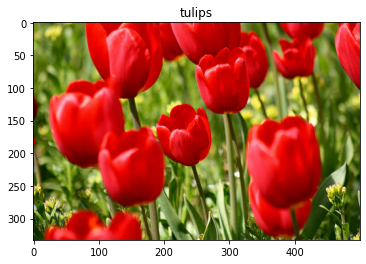

In [ ]:
get_label_name = metadata.features['label'].int2str
image,label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [ ]:
from tensorflow.keras import layers

In [ ]:
img_size = 224

resize_and_rescale = tf.keras.Sequential([
                                          layers.experimental.preprocessing.Resizing(img_size,img_size),
                                          layers.experimental.preprocessing.Rescaling(1./127.5,offset=-1)
])

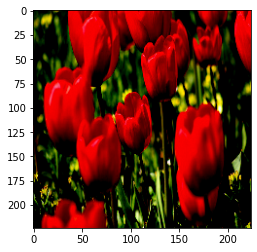

In [ ]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [ ]:
print(result.numpy().min(),result.numpy().max())

-1.0 1.0


In [ ]:
data_augmentation = tf.keras.Sequential([
                                         layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                         layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
print(image.shape)
image = tf.expand_dims(image,0)
image.shape

(333, 500, 3)


TensorShape([1, 333, 500, 3])

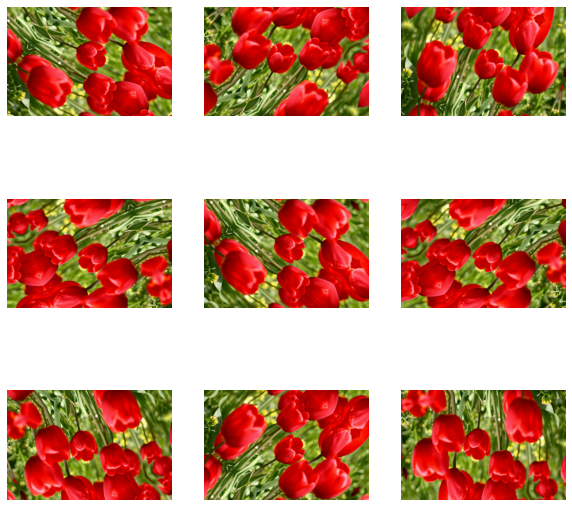

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(augmented_image[0])
  plt.axis('off')

# 모델에 전저치 레이어 적용

In [ ]:
model = tf.keras.Sequential([
                             resize_and_rescale,
                             data_augmentation,
                             layers.Conv2D(16,3,padding='same',activation='relu'),
                             layers.MaxPooling2D(),
])

# 데이터셋에 전처리 레이어 적용

In [ ]:
aug_ds = train_ds.map(lambda x,y:(resize_and_rescale(x,training=True),y))

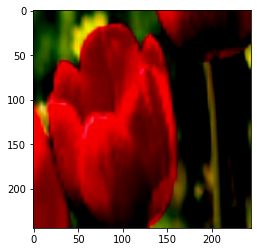

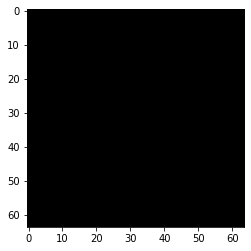

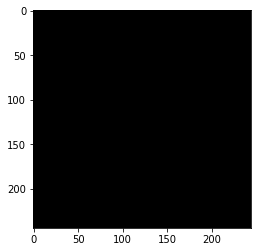

In [ ]:
plt.imshow(result)
plt.show()
tf.image.crop_and_resize
result = tf.image.resize_with_crop_or_pad(result/255.,64,64)
plt.imshow(result)
plt.show()
result = tf.image.resize(result/255.,(244,244))
plt.imshow(result)
plt.show()

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

def prepare(ds,shuffle=False,augment=False):
  # Resize and rescale all datasets
  ds = ds.map(lambda x,y:(resize_and_rescale(x),y), num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)
  ds = ds.batch(batch_size)

  if augment:
    ds = ds.map(lambda x,y:(data_augmentation(x,training=True),y),num_parallel_calls=AUTOTUNE)
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds , shuffle=True,augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [ ]:
model = tf.keras.Sequential([
                             layers.Conv2D(16,3,padding='same',activation='relu'),
                             layers.MaxPooling2D(),
                             layers.Conv2D(32,3,padding='same',activation='relu'),
                             layers.MaxPooling2D(),
                             layers.Conv2D(64,3,padding='same',activation='relu'),
                             layers.MaxPooling2D(),
                             layers.Flatten(),
                             layers.Dense(128,activation='relu'),
                             layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs =5
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/5
92/92 [==============================] - 159s 2s/step - loss: 1.7637 - accuracy: 0.3260 - val_loss: 1.1204 - val_accuracy: 0.5232
Epoch 2/5
92/92 [==============================] - 148s 2s/step - loss: 1.1103 - accuracy: 0.5223 - val_loss: 0.9988 - val_accuracy: 0.5913
Epoch 3/5
92/92 [==============================] - 147s 2s/step - loss: 1.0031 - accuracy: 0.5796 - val_loss: 0.9665 - val_accuracy: 0.6158
Epoch 4/5
92/92 [==============================] - 147s 2s/step - loss: 0.9554 - accuracy: 0.6193 - val_loss: 0.8554 - val_accuracy: 0.6649
Epoch 5/5
92/92 [==============================] - 152s 2s/step - loss: 0.8596 - accuracy: 0.6519 - val_loss: 0.8162 - val_accuracy: 0.6894


In [ ]:
loss,acc = model.evaluate(test_ds)
print('Accuracy',acc)

12/12 [==============================] - 6s 443ms/step - loss: 0.7905 - accuracy: 0.6676
Accuracy 0.667574942111969


# Lambda Layer 를 사용하여 증강

In [ ]:
def random_invert_img(x,p=0.5):
  if tf.random.uniform([]) <p:
    x = (255-x)
  else:
    x
  return x

In [ ]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x,factor))
random_invert = random_invert()

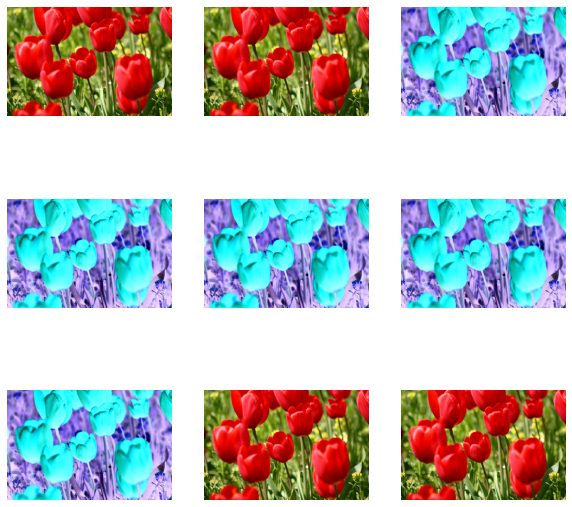

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(augmented_image[0].numpy().astype('uint8'))
  plt.axis('off')

# 서브 클래스 생성하여 데이터 증강

In [ ]:
def random_invert_img(x,p=0.5):
  if tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [ ]:
class RandomInvert(layers.Layer):
  def __init__(self,factor=0.5,**kwargs):
    super().__init__(**kwargs)
    self.factor = factor
  def call(self,x):
    return random_invert_img(x)

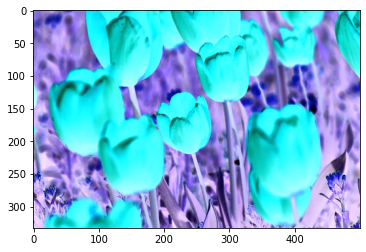

In [ ]:
_ = plt.imshow(RandomInvert()(image)[0])

# tf.image 사용

In [ ]:
(train_ds,val_ds,test_ds),metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

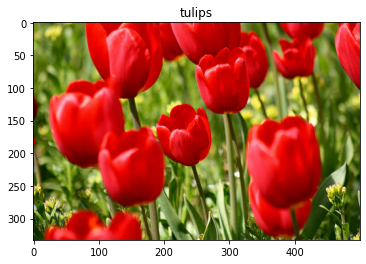

In [ ]:
image,label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [ ]:
def visualize(original,augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

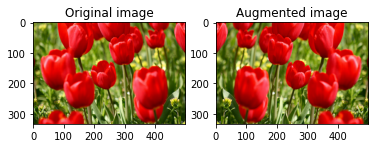

In [ ]:
flipped = tf.image.flip_left_right(image)
visualize(image,flipped)

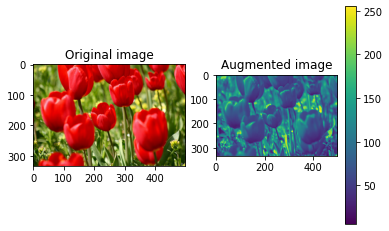

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image,tf.squeeze(grayscaled))
_ = plt.colorbar()

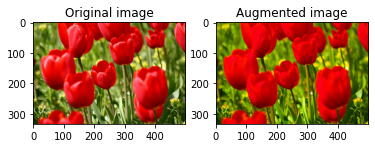

In [ ]:
saturated = tf.image.adjust_saturation(image,3)
visualize(image,saturated)

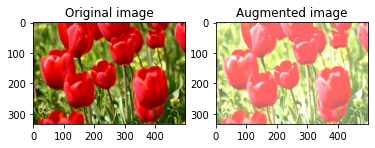

In [ ]:
bright = tf.image.adjust_brightness(image,.4)
visualize(image,bright)

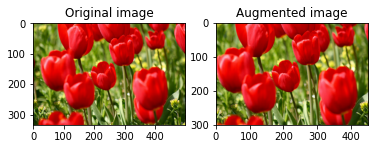

In [ ]:
cropped = tf.image.central_crop(image,central_fraction=.9)
visualize(image,cropped)

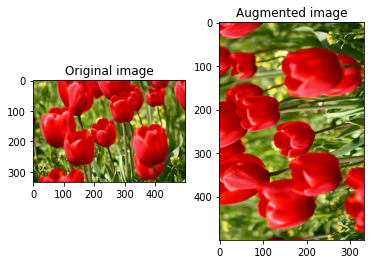

In [ ]:
rotated = tf.image.rot90(image)
visualize(image,rotated)

tf.image.func(default = image)

- flip_left_right 
- rgb_to_grayscale
- adjust_saturation(image,3)   : 이미지 포화  (채도계수) 
- adjust_brightness(image,0.4)  : 이미지 밝기 (밝기 계수)
- central_crop(image,central_fraction=0.5) : 이미지 중앙 자르기 
- rot90   


# 데이터셋에 증강 적용

In [ ]:
def resize_and_rescale(image,label):
  iamge = tf.cast(image,tf.float32)
  image = tf.image.resize(image,[img_size,img_size])
  image = (image/255.0)
  return image,label

In [ ]:
def augment(image,label):
  image,label = resize_and_rescale(image,label)
  # Add 6pixels of padding
  image = tf.image.resize_with_crop_or_pad(image,img_size+6,img_size+6)

  image = tf.image.random_crop(image,size=[img_size,img_size,3])
  image = tf.image.random_brightness(image,max_delta=0.5)
  image = tf.clip_by_value(image,0,1)
  return image,label

In [ ]:
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment,num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [ ]:
val_ds = (
    val_ds
    .map(resize_and_rescale,num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [ ]:
test_ds = (
    test_ds
    .map(resize_and_rescale,num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)